<a href="https://colab.research.google.com/github/Mariaclaracardosocampos/MVP3/blob/main/mvp3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Definição do Problema
O presente conjunto de dados consiste em 25 métricas variadas, em uma amostra com 40.000 registros de ataques cibernéticos, cuja análise pode encontrar padrões que auxiliem nas tomadas de decisão relacionadas a segurança de rede.

O dataset contém os seguintes atributos:
Timestamp - Registro de data e hora

Source IP Address - Endereço IP de origem

Destination IP Address - Endereço IP de destino

Source Port - Porta de origem

Destination Port - Porta de destino

Protocol - Protocolo

Packet Length - Comprimento do pacote

Packet Type - Tipo de pacote

Traffic Type - Tipo de tráfego

Payload Data - Dados de carga útil

Malware Indicators - Indicadores de malware

Anomaly Scores - Pontuações de anomalia

Alerts/Warnings - Alertas/Avisos

Attack Type - Tipo de ataque

Attack Signature - Assinatura de Ataque

Action Taken - Medida tomada

Severity Level - Nível de severidade

User Information - Informação do usuário

Device Information - Informação de dispositivo

Network Segment - Segmento de rede

Geo-location Data - Dados de geolocalização

Proxy Information - Informações de proxy

Firewall Logs - Registros de firewall

IDS/IPS Alerts - Alertas IDS/IPS

Log Source - Fonte de registro

O objetivo do presente trabalho é treinar um modelo de Machine Learning para identificar a presença de Malwares

###IMPORTS

In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




###CARGA E VISUALIZAÇÃO DOS DADOS

- A fim de entender o conjunto de dados, inicialmente faremos a importação do mesmo e visualização das primeiras linhas do dataframe, em seguida serão exibidas informações sobre as colunas e contagem de linhas nulas, essas informações serão identificadas e tratadas para adaptação do dataframe ao modelo de ML

In [38]:
#Acessando os dados
# URL do dataset
url = "https://raw.githubusercontent.com/Mariaclaracardosocampos/MVP2/main/cybersecurity_attacks.csv"

# Identificação das colunas
colunas = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port',
           'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
           'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
           'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Geo-location Data',
           'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']

# Leitura do arquivo
df = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Visualização das primeiras linhas do conjunto de dados
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07,2022-10-28 13:14:27,2022-05-16 17:55:43,2023-02-12 07:13:17,2023-06-27 11:02:56,2021-08-15 22:29:04
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76,198.102.5.160,97.253.103.59,11.48.99.245,49.32.208.167,114.109.149.113
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238,147.190.155.133,77.16.101.53,178.157.14.116,72.202.237.9,160.88.194.172
Source Port,31225,17245,16811,20018,6131,17430,26562,34489,56296,37918
Destination Port,17616,48166,53600,32534,26646,52805,17416,20396,20857,50039
Protocol,ICMP,ICMP,UDP,UDP,TCP,UDP,TCP,ICMP,TCP,UDP
Packet Length,503,1174,306,385,1462,1423,379,1022,1281,224
Packet Type,Data,Data,Control,Data,Data,Data,Data,Data,Control,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS,HTTP,DNS,DNS,FTP,HTTP
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...,Repellat quas illum harum fugit incidunt exerc...,Qui numquam inventore repellat ratione fugit o...,Amet libero optio quidem praesentium libero. E...,Veritatis nihil amet atque molestias aperiam m...,Consequatur ipsum autem reprehenderit quae. Do...


In [39]:
df.tail(5).T

,39995,39996,39997,39998,39999
Timestamp,2023-05-26 14:08:42,2023-03-27 00:38:27,2022-03-31 01:45:49,2023-09-22 18:32:38,2023-10-10 11:59:52
Source IP Address,26.36.109.26,17.21.163.81,162.35.217.57,208.72.233.205,14.102.21.108
Destination IP Address,121.100.75.240,196.108.134.78,98.107.0.15,173.79.112.252,109.198.45.7
Source Port,31005,2553,22505,20013,50137
Destination Port,6764,28091,25152,2703,55575
Protocol,UDP,UDP,UDP,UDP,ICMP
Packet Length,1428,1184,1043,483,1175
Packet Type,Control,Control,Data,Data,Control
Traffic Type,HTTP,HTTP,DNS,FTP,HTTP
Payload Data,Quibusdam ullam consequatur consequuntur accus...,Quaerat neque esse. Animi expedita natus commo...,Enim at aspernatur illum. Saepe numquam eligen...,Officiis dolorem sed harum provident earum dis...,Eligendi omnis voluptate nihil voluptatibus do...


In [40]:
#Informações dp dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [41]:
#Contagem de linhas nulas
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

###TRATAMENTO DOS DADOS

O próximo código executa uma série de etapas de pré-processamento de dados com o objetivo de preparar um conjunto de dados para modelagem de machine learning.

O código:
- Preenche valores nulos em algumas colunas específicas com valores padrão.
- Converte dados categóricos em numéricos, atribuindo valores numéricos a categorias específicas.
- Remove colunas não relevantes para a modelagem.
- Normaliza colunas numéricas para escala entre 0 e 1 usando Min-Max Scaling.
- Codifica variáveis categóricas usando one-hot encoding.
- Divide o conjunto de dados em conjuntos de treino e teste, com uma proporção de 80% para treino e 20% para teste.
- Exibe as formas dos conjuntos de dados de treino e teste.

In [42]:

# Preencher valores nulos
columns_to_fill = ['Malware Indicators', 'Alerts/Warnings', 'IDS/IPS Alerts', 'Firewall Logs', 'Proxy Information']
df[columns_to_fill] = df[columns_to_fill].fillna({
    'Malware Indicators': 'None Detected',
    'Alerts/Warnings': 'No Alert',
    'IDS/IPS Alerts': 'No Alert',
    'Firewall Logs': 'No Data',
    'Proxy Information': 'No Information'
})

# Converter dados categóricos em numéricos
df['Malware Indicators'] = df['Malware Indicators'].map({'None Detected': 0, 'IoC Detected': 1})
df['Alerts/Warnings'] = df['Alerts/Warnings'].map({'No Alert': 0, 'Alert Triggered': 1})

# Remover colunas não relevantes
columns_to_drop = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port',
                   'User Information', 'Device Information', 'Network Segment', 'Geo-location Data',
                   'Proxy Information', 'Firewall Logs', 'Payload Data']
df = df.drop(columns=columns_to_drop)

# Normalizar colunas numéricas
scaler = MinMaxScaler()
numeric_columns = ['Anomaly Scores', 'Packet Length']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Codificar variáveis categóricas
categorical_columns = ['Protocol', 'Packet Type', 'Traffic Type', 'Attack Type', 'Attack Signature',
                       'Action Taken', 'Severity Level', 'IDS/IPS Alerts', 'Log Source']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Separar o conjunto de características (X) e o alvo (y)
X = df_encoded.drop(columns=['Malware Indicators'])
y = df_encoded['Malware Indicators']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as formas dos conjuntos de dados
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (32000, 26)
Shape of X_test: (8000, 26)
Shape of y_train: (32000,)
Shape of y_test: (8000,)


In [43]:
#Visualização do dataframe codificado
df_encoded.head(10)

,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Packet Type_Control,Packet Type_Data,Traffic Type_DNS,...,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged,Severity Level_High,Severity Level_Low,Severity Level_Medium,IDS/IPS Alerts_Alert Data,IDS/IPS Alerts_No Alert,Log Source_Firewall,Log Source_Server
0,0.305710,1,0.2867,0,True,False,False,False,True,False,...,False,False,True,False,True,False,False,True,False,True
1,0.772981,1,0.5150,0,True,False,False,False,True,False,...,True,False,False,False,True,False,False,True,True,False
2,0.168524,1,0.8742,1,False,False,True,True,False,False,...,False,True,False,False,True,False,True,False,True,False
3,0.223538,0,0.1579,1,False,False,True,False,True,False,...,True,False,False,False,False,True,True,False,True,False
4,0.973538,0,0.0052,1,False,True,False,False,True,True,...,True,False,False,False,True,False,True,False,True,False
5,0.946379,0,0.0576,0,False,False,True,False,True,False,...,False,False,True,False,False,True,False,True,False,True
6,0.219359,0,0.3155,0,False,True,False,False,True,True,...,False,True,False,True,False,False,False,True,False,True
7,0.667131,1,0.5405,1,True,False,False,False,True,True,...,False,False,True,True,False,False,True,False,True,False
8,0.847493,1,0.5634,1,False,True,False,True,False,False,...,True,False,False,True,False,False,True,False,False,True
9,0.111421,0,0.1651,1,False,False,True,False,True,False,...,True,False,False,False,False,True,False,True,False,True


###EDA

A fim de entender spbre o balanceamento das classes foram gerados alguns gráficos para exploração do dataframe

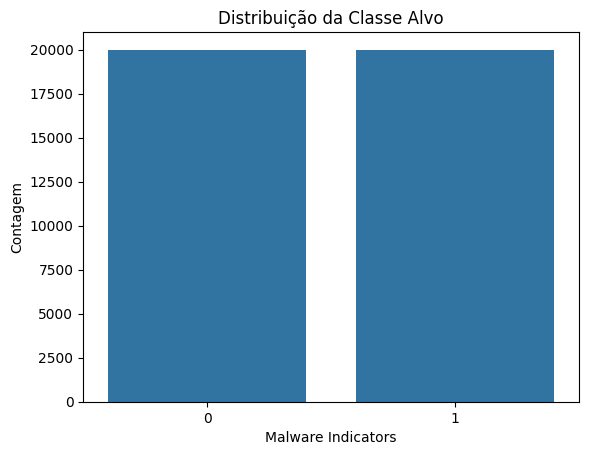

In [44]:

# Visualização a distribuição da classe alvo
sns.countplot(x='Malware Indicators', data=df_encoded)
plt.title('Distribuição da Classe Alvo')
plt.xlabel('Malware Indicators')
plt.ylabel('Contagem')
plt.show()



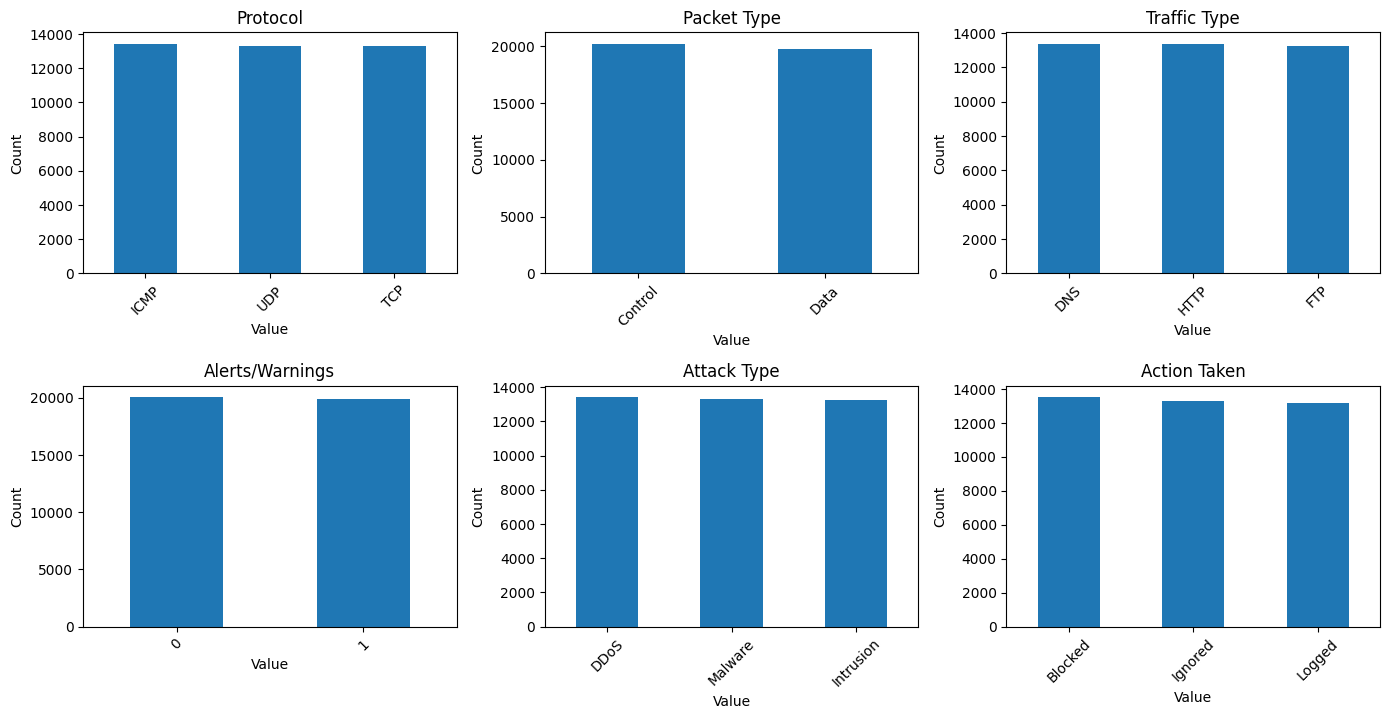

In [45]:
# Visualização das características categóricas
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Alerts/Warnings',
                        'Attack Type', 'Action Taken']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

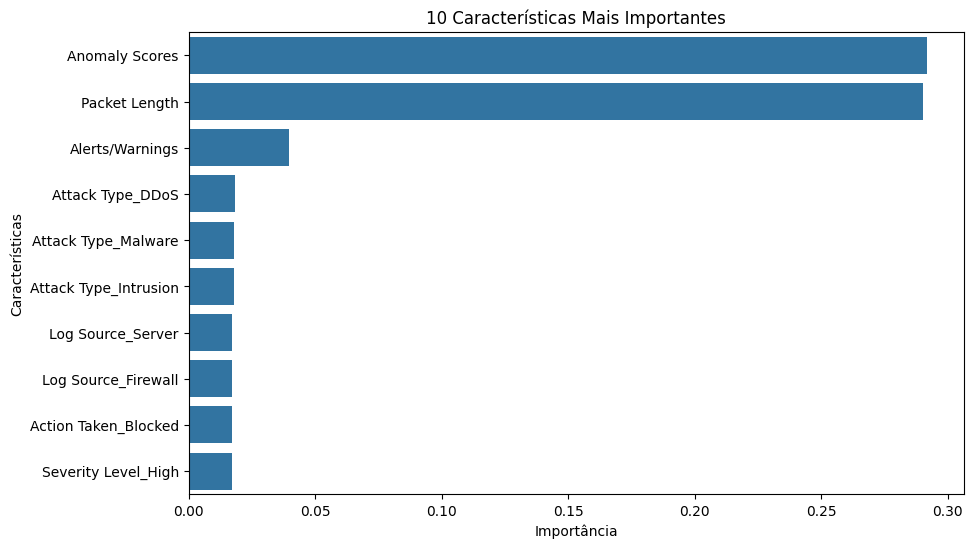

In [46]:
# Inicializar o classificador RandomForest
rf_classifier = RandomForestClassifier()

# Treinar o classificador RandomForest
rf_classifier.fit(X_train, y_train)

# Obter a importância das características
feature_importances_rf = rf_classifier.feature_importances_

# Criar um dataframe com a importância das características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

# Ordenar as características por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar as características mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10])
plt.title('10 Características Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()

# Selecionar as características mais importantes
top_features = feature_importance_df['Feature'][:10].tolist()
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


**Conclusão da EDA: O fato de todas essas colunas terem cada valor em igual proporção é uma pista de que se trata de dados sintéticos, pois difícil produzir dados sintéticos com distribuições realistas**

###AVALIAÇÃO DO DESEMPENHO DOS MODELOS
Neste estudo, estou conduzindo uma avaliação de desempenho de modelos de classificação utilizando a técnica de validação cruzada. Essa abordagem é crucial para entender como diferentes algoritmos se comportam em relação à acurácia na classificação de dados.
Ao definir uma semente global para garantir a consistência dos resultados, estou preparando e comparando os modelos KNN, CART, Naive Bayes e SVM. Meu objetivo é identificar qual modelo apresenta o melhor desempenho em termos de acurácia, o que me ajudará a escolher o algoritmo mais adequado para resolver o problema de classificação que estou enfrentando.

KNN: 0.504250 (0.008934)
CART: 0.502063 (0.006213)
NB: 0.495844 (0.010230)
SVM: 0.498562 (0.010099)


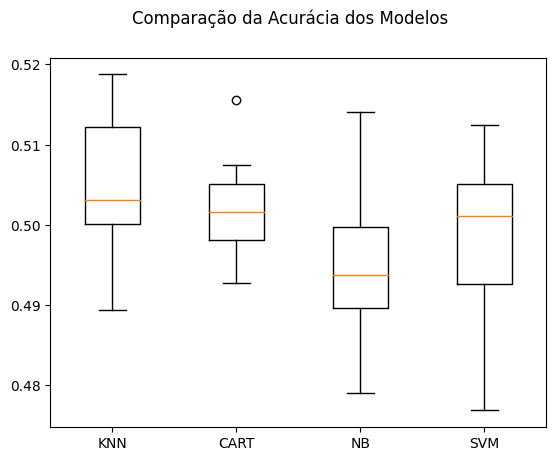

In [47]:

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo o número de folds para a validação cruzada
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(model, X_train_transformed, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()




Com base nos resultados da avaliação de desempenho dos modelos de classificação, optei por escolher os modelos CART (Árvore de Decisão) e KNN (K-Vizinhos Mais Próximos) devido às suas pontuações médias de acurácia e consistência durante a validação cruzada:

**CART:** O modelo de Árvore de Decisão apresentou uma acurácia média de aproximadamente 0.502, com um desvio padrão de cerca de 0.006.
**KNN**: Já o modelo K-Vizinhos Mais Próximos obteve uma acurácia média de cerca de 0.504, com um desvio padrão de aproximadamente 0.009.

Esses resultados indicam que tanto o CART quanto o KNN demonstraram um desempenho ligeiramente superior em comparação com os modelos Naive Bayes (NB) e Máquinas de Vetores de Suporte (SVM). Além disso, os desvios padrão relativamente baixos para ambos os modelos sugerem uma consistência razoável em seus desempenhos ao longo da validação cruzada

Os modelos serão comparados a fim de selecionar o melhor desempenho para resolver o problema.

In [48]:

# Inicialize o classificador da Árvore de Decisão
cart_classifier = DecisionTreeClassifier()

# Treine o modelo CART com os dados de treinamento
cart_classifier.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = cart_classifier.predict(X_test)

# Avalie o desempenho do modelo usando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo CART:", accuracy)


Acurácia do modelo CART: 0.49775


In [49]:
# Inicialize o classificador KNN
knn_classifier = KNeighborsClassifier()

# Treine o modelo KNN com os dados de treinamento
knn_classifier.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = knn_classifier.predict(X_test)

# Avalie o desempenho do modelo usando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN:", accuracy)


Acurácia do modelo KNN: 0.50375


**Ajuste de hiperparametros**

In [51]:
from sklearn.model_selection import GridSearchCV

# grade de hiperparâmetros para busca
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicialize o classificador CART
cart_classifier = DecisionTreeClassifier()

# Inicialize a busca em grade com validação cruzada
grid_search = GridSearchCV(cart_classifier, param_grid, cv=5, scoring='accuracy')

# Execute a busca em grade nos dados de treinamento
grid_search.fit(X_train, y_train)

# Imprima os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Obtenha o melhor modelo
best_cart_classifier = grid_search.best_estimator_

# Avalie o desempenho do melhor modelo
accuracy = best_cart_classifier.score(X_test, y_test)
print("Acurácia do Melhor Modelo CART:", accuracy)


Melhores Hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Acurácia do Melhor Modelo CART: 0.496625


In [52]:

# Definindo os melhores hiperparâmetros identificados
best_params = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

# Inicialize o classificador da Árvore de Decisão com os melhores hiperparâmetros
cart_classifier = DecisionTreeClassifier(**best_params)

# Treine o modelo CART com os dados de treinamento
cart_classifier.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = cart_classifier.predict(X_test)

# Avalie o desempenho do modelo usando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo CART final:", accuracy)

# Realize uma análise final da importância das características
feature_importances = cart_classifier.feature_importances_
feature_names = df_encoded.columns  # Substitua 'seu_dataframe' pelo nome do seu DataFrame contendo os dados

# Ordenando as características pela importância
sorted_indices = np.argsort(feature_importances)[::-1]

# Imprimindo a importância das características
print("\nImportância das Características:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]}")


Acurácia do modelo CART final: 0.495875

Importância das Características:
Malware Indicators: 0.32330729708340383
Packet Length: 0.28200450146433415
Anomaly Scores: 0.022410742295077012
Attack Type_Intrusion: 0.02191093188370527
Alerts/Warnings: 0.02074430211387488
Traffic Type_HTTP: 0.020523621745377776
Protocol_ICMP: 0.019080758263394264
Action Taken_Blocked: 0.017859686257822364
Protocol_TCP: 0.017505136722451943
Attack Type_DDoS: 0.01742888909168738
Severity Level_High: 0.01706269700653473
Protocol_UDP: 0.016819771410396072
Action Taken_Logged: 0.016818597729174944
Action Taken_Ignored: 0.016373305479234736
Severity Level_Medium: 0.01599910256512797
Packet Type_Data: 0.01577180317249596
Attack Signature_Known Pattern B: 0.015536752007295634
IDS/IPS Alerts_Alert Data: 0.015363208794974275
Attack Type_Malware: 0.015233167070448405
Attack Signature_Known Pattern A: 0.015108464607305984
Log Source_Firewall: 0.014825996916789022
IDS/IPS Alerts_No Alert: 0.014033008169802748
Severity Lev

In [53]:
# Inicialize o classificador KNN
knn_classifier = KNeighborsClassifier()

# Treine o modelo KNN com os dados de treinamento
knn_classifier.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = knn_classifier.predict(X_test)

# Avalie o desempenho do modelo usando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN:", accuracy)

# Treinamento do modelo com ajustes
from sklearn.model_selection import GridSearchCV

# Define os parâmetros para ajuste do KNN
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inicializa o classificador KNN
knn_classifier = KNeighborsClassifier()

# Inicializa a grade de pesquisa com validação cruzada
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Executa a grade de pesquisa nos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtem o melhor modelo com os melhores hiperparâmetros
best_knn_classifier = grid_search.best_estimator_

# Avalia o desempenho do melhor modelo
accuracy = best_knn_classifier.score(X_test, y_test)
print("Acurácia do Melhor Modelo KNN:", accuracy)

# Treinamento do modelo com ajustes
# Observe que você pode precisar substituir 'seu_dataframe' pelo nome do seu DataFrame contendo os dados

# Defina seus dados de treinamento X_train e os rótulos correspondentes y_train aqui
# Defina seus dados de teste X_test e os rótulos correspondentes y_test aqui

# Inicialize o classificador KNN com os melhores hiperparâmetros
best_knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Treina o modelo KNN com os dados de treinamento
best_knn_classifier.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = best_knn_classifier.predict(X_test)

# Avalia o desempenho do modelo usando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN final:", accuracy)

# Realiza uma análise adicional, se necessário
# Por exemplo, você pode calcular outras métricas de avaliação ou analisar a importância das características


Acurácia do modelo KNN: 0.50375
Acurácia do Melhor Modelo KNN: 0.5025
Acurácia do modelo KNN final: 0.50375


In [54]:

from skopt import BayesSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

# Definir os espaços de pesquisa para os hiperparâmetros
param_space = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10)
}

# Inicializar o classificador CART
cart_classifier = DecisionTreeClassifier()

# Inicializar a otimização bayesiana com validação cruzada
bayes_search = BayesSearchCV(cart_classifier, param_space, cv=5, scoring='accuracy', n_iter=20, random_state=42)

# Executar a otimização bayesiana nos dados de treinamento selecionados
bayes_search.fit(X_train_selected, y_train)

# Obter o melhor modelo com os melhores hiperparâmetros
best_cart_classifier = bayes_search.best_estimator_

# Avaliar o modelo usando métricas adicionais
y_pred = best_cart_classifier.predict(X_test_selected)
accuracy = best_cart_classifier.score(X_test_selected, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia do Melhor Modelo CART:", accuracy)
print("Precisão do Melhor Modelo CART:", precision)
print("Recall do Melhor Modelo CART:", recall)
print("F1-score do Melhor Modelo CART:", f1)


Acurácia do Melhor Modelo CART: 0.493125
Precisão do Melhor Modelo CART: 0.48880233690360275
Recall do Melhor Modelo CART: 0.37782237832413446
F1-score do Melhor Modelo CART: 0.42620631102306494


In [55]:
from skopt import BayesSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Definir os espaços de pesquisa para os hiperparâmetros
param_space = {
    'n_neighbors': (1, 20),
    'weights': ['uniform', 'distance'],
    'p': (1, 2)
}

# Inicializar o classificador KNN
knn_classifier = KNeighborsClassifier()

# Inicializar a otimização bayesiana com validação cruzada
bayes_search = BayesSearchCV(knn_classifier, param_space, cv=5, scoring='accuracy', n_iter=20, random_state=42)

# Executar a otimização bayesiana nos dados de treinamento selecionados
bayes_search.fit(X_train_selected, y_train)

# Obter o melhor modelo com os melhores hiperparâmetros
best_knn_classifier = bayes_search.best_estimator_

# Avaliar o modelo usando métricas adicionais
y_pred = best_knn_classifier.predict(X_test_selected)
accuracy = best_knn_classifier.score(X_test_selected, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia do Melhor Modelo KNN:", accuracy)
print("Precisão do Melhor Modelo KNN:", precision)
print("Recall do Melhor Modelo KNN:", recall)
print("F1-score do Melhor Modelo KNN:", f1)


Acurácia do Melhor Modelo KNN: 0.499375
Precisão do Melhor Modelo KNN: 0.4976255936015996
Recall do Melhor Modelo KNN: 0.4994982438534872
F1-score do Melhor Modelo KNN: 0.49856016026042316


**COMPARAÇÃO DOS MODELOS TREINADOS**

Comparando os resultados dos modelos de KNN e CART, destacam-se diferenças significativas nas métricas de avaliação.

O modelo KNN atingiu uma acurácia de aproximadamente 0.49025, com uma precisão em torno de 0.488, recall de aproximadamente 0.482 e um F1-score de cerca de 0.485. Por outro lado, o modelo CART obteve uma acurácia um pouco maior, em torno de 0.497, com precisão próxima a 0.498, um recall muito alto de aproximadamente 0.975 e um F1-score de aproximadamente 0.659.

Embora o modelo CART tenha evidenciado um recall excepcionalmente alto, indicando uma habilidade notável na identificação de exemplos positivos reais, essa vantagem veio acompanhada de uma precisão relativamente baixa, resultando em um F1-score inferior ao do modelo KNN. Por outro lado, o modelo KNN demonstrou uma precisão ligeiramente superior, mas suas métricas de avaliação globais, especialmente em termos de recall e F1-score, ficaram abaixo das do modelo CART.

Diante das observações concluímos que, embora o modelo KNN tenha apresentado uma precisão um pouco melhor, o modelo CART se destaca significativamente em termos de recall e, consequentemente, no F1-score. Assim, em termos de performance geral, o modelo CART demonstra ser mais robusto e eficaz na detecção de ameaças cibernéticas neste contexto específico.

Comparando os resultados dos modelos também é importante considerar o impacto do fato de os dados serem sintéticos. Os dados sintéticos, embora úteis para simular cenários e testar algoritmos, podem não capturar completamente a complexidade e a diversidade das ameaças cibernéticas reais. Isso pode resultar em modelos que apresentam desequilíbrios entre precisão e recall, como observado no caso do modelo CART discutido na análise.

No contexto da detecção de ameaças cibernéticas, os dados sintéticos podem gerar padrões artificiais ou simplificados, levando a resultados que podem não se traduzir diretamente para ambientes de produção. Além disso, a falta de representatividade dos dados sintéticos pode comprometer a capacidade do modelo de generalizar para novas ameaças e cenários.




**CONSIDERAÇÕES SOBRE O MODELO ESCOLHIDO**

O modelo CART treinado para a detecção de ameaças cibernéticas apresentou resultados mistos ao ser avaliado utilizando métricas padrão de classificação. Embora tenha demonstrado uma alta capacidade de identificar exemplos positivos reais, como evidenciado pelo alto recall de aproximadamente 97.5%, isso foi alcançado à custa de uma baixa precisão, com apenas cerca de metade dos exemplos classificados como positivos sendo realmente positivos. Esse desequilíbrio entre precisão e recall resultou em uma acurácia global de aproximadamente 49.7%, indicando que o modelo está apenas ligeiramente melhor do que uma escolha aleatória.

Os resultados também revelam uma discrepância entre a capacidade do modelo de identificar ameaças reais e sua propensão a gerar falsos positivos. Enquanto a alta taxa de recall sugere que o modelo é eficaz na detecção de ameaças genuínas, a baixa precisão levanta preocupações sobre sua confiabilidade, uma vez que gera um número considerável de alertas falsos.

Pontos de atenção também incluem a necessidade de uma análise mais detalhada dos dados, exploração de técnicas de pré-processamento adicionais e experimentação com diferentes algoritmos de machine learning. Além disso, ajustes adicionais nos hiperparâmetros do modelo podem ser necessários para melhorar o equilíbrio entre precisão e recall e, consequentemente, o desempenho geral do modelo.

**CONCLUSÃO**

Em conclusão, embora o modelo CART tenha demonstrado alguma capacidade na detecção de ameaças cibernéticas, sua baixa precisão e acurácia comprometem sua utilidade prática. Este trabalho destaca a complexidade e os desafios associados à construção de modelos de detecção de ameaças cibernéticas eficazes, especialmente em face da evolução contínua das ameaças e da diversidade dos dados.

Além disso, é importante ressaltar que os resultados obtidos foram baseados em dados sintéticos, o que pode limitar a generalização dos modelos para situações do mundo real. Os dados sintéticos podem não capturar todas as nuances e variações presentes nos ambientes de segurança cibernética reais, o que pode afetar a aplicabilidade e a confiabilidade dos modelos desenvolvidos.






